# Program synthesis results analysis

In [1]:
import os
import sys 
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
sys.path.append("../")
sys.path.append("../../")

In [3]:
from src.utils.files import json2data

path = "/home/koutchc1/learnlab2023/outputs/gpt-3.5-turbo_v1_result_new.csv"
df = pd.read_csv(path)
df

,Unnamed: 0.1,Unnamed: 0,id,course_id,type,exam,prompt,testcase,max_score,input_str,...,list,list_2d,dictionary,item_set,tuple,skeleton,code,exec_result,score,text
0,0,0,a3_3_animals,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,1,0,0,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,\nfor animal in list_of_animals:\n print(an...,completed,0.0,Unit Test Returned: 0.0\n
1,1,1,a3_1_cargo,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\nimport random, m...",100,0,...,1,0,0,0,0,NaN,NaN,completed,0.0,----------------------------------------------...
2,2,2,a3_3_games,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,\nfor game in list_of_games:\n print(game)\n,completed,0.0,Unit Test Returned: 0.0\n
3,3,3,a3_4_heights,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,0,0,NaN,"\nlist_of_heights = [53, 60, 65]\nprint(max(li...","failed: must be real number, not str",0.0,NaN
4,4,6,lsn9_practice4,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,0,0,NaN,\ndef get_area_in_acres():\n acres = float(...,completed,0.0,--------------------------------------------\n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,374,16,lsn8_fuel,2,lab,0,"Bellow is a problem statement, write a program...",from cs110 import autograder\r\nimport random\...,100,0,...,0,0,0,0,0,NaN,"\ndef pilot_action(fuel_load, distance_to_base...",completed,0.0,-------------------------------\nTest 1\n-----...
375,375,234,a1_4_satellite,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,0,0,NaN,NaN,completed,0.0,----------------------------------\nTesting sp...
376,376,249,lsn21_bouncingball,3,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,0,0,NaN,NaN,completed,100.0,Thank you for your submission. Your instructor...
377,377,537,Lists2_population,4,lab,0,"Bellow is a problem statement, write a program...",from cs110 import autograder\r\nimport random\...,100,0,...,0,1,0,0,0,NaN,"\ncities_table = [\n [""Tokyo"", 37435191],\n...",completed,100.0,\nCORRECT\nUnit Test Returned: 100.0\n


In [4]:
# TODO: load the results for both models at the same time, and then merge them together 

In [5]:
fails = df[df["exec_result"] != "completed"]
df = df[df["exec_result"] == "completed"]
df

,Unnamed: 0.1,Unnamed: 0,id,course_id,type,exam,prompt,testcase,max_score,input_str,...,list,list_2d,dictionary,item_set,tuple,skeleton,code,exec_result,score,text
0,0,0,a3_3_animals,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,1,0,0,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,\nfor animal in list_of_animals:\n print(an...,completed,0.0,Unit Test Returned: 0.0\n
1,1,1,a3_1_cargo,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\nimport random, m...",100,0,...,1,0,0,0,0,NaN,NaN,completed,0.0,----------------------------------------------...
2,2,2,a3_3_games,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,\nfor game in list_of_games:\n print(game)\n,completed,0.0,Unit Test Returned: 0.0\n
4,4,6,lsn9_practice4,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,0,0,NaN,\ndef get_area_in_acres():\n acres = float(...,completed,0.0,--------------------------------------------\n...
5,5,7,lsn9_practice3,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,0,0,NaN,"\nprice = float(input(""Enter the price in US d...",completed,0.0,Incorrect Pound Conversion. Expected 458.304\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,374,16,lsn8_fuel,2,lab,0,"Bellow is a problem statement, write a program...",from cs110 import autograder\r\nimport random\...,100,0,...,0,0,0,0,0,NaN,"\ndef pilot_action(fuel_load, distance_to_base...",completed,0.0,-------------------------------\nTest 1\n-----...
375,375,234,a1_4_satellite,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,0,0,NaN,NaN,completed,0.0,----------------------------------\nTesting sp...
376,376,249,lsn21_bouncingball,3,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,0,0,NaN,NaN,completed,100.0,Thank you for your submission. Your instructor...
377,377,537,Lists2_population,4,lab,0,"Bellow is a problem statement, write a program...",from cs110 import autograder\r\nimport random\...,100,0,...,0,1,0,0,0,NaN,"\ncities_table = [\n [""Tokyo"", 37435191],\n...",completed,100.0,\nCORRECT\nUnit Test Returned: 100.0\n


In [6]:
fails

,Unnamed: 0.1,Unnamed: 0,id,course_id,type,exam,prompt,testcase,max_score,input_str,...,list,list_2d,dictionary,item_set,tuple,skeleton,code,exec_result,score,text
3,3,3,a3_4_heights,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,0,0,NaN,"\nlist_of_heights = [53, 60, 65]\nprint(max(li...","failed: must be real number, not str",0.0,NaN
17,17,20,lsn7_largest,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,0,0,NaN,"\ndef find_largest(a, b, c):\n if a >= b an...","failed: must be real number, not str",0.0,NaN
20,20,23,lsn6_temperature,2,lab,0,"Bellow is a problem statement, write a program...",from cs110 import autograder\r\nimport random\...,100,0,...,0,0,0,0,0,NaN,\n# Prompt user for temperature in °F\ntemp_f ...,"failed: must be real number, not str",0.0,NaN
25,25,28,lsn6_calories,2,lab,0,"Bellow is a problem statement, write a program...",from cs110 import autograder\r\nimport random\...,100,0,...,0,0,0,0,0,NaN,\n# get input values\nage = int(input())\nweig...,"failed: must be real number, not str",0.0,NaN
26,26,29,lsn6_bits_to_kmg,2,lab,0,"Bellow is a problem statement, write a program...",from cs110 import autograder\r\nimport random\...,100,0,...,0,0,0,0,0,NaN,\ndef convert_bits_to_memory():\n bits = in...,"failed: must be real number, not str",0.0,NaN
27,27,30,lsn6_bits_to_bytes,2,lab,0,"Bellow is a problem statement, write a program...",from cs110 import autograder\r\nimport random\...,100,0,...,0,0,0,0,0,NaN,"\nnum_bits = int(input(""Enter the number of bi...","failed: must be real number, not str",0.0,NaN
34,34,37,lsn5_girlscouts,2,lab,0,"Bellow is a problem statement, write a program...",from cs110 import autograder\r\nimport random\...,100,0,...,0,0,0,0,0,NaN,NaN,failed: list index out of range,0.0,NaN
40,40,43,lsn33_practice7,2,lab,0,"Bellow is a problem statement, write a program...","import webbrowser\r\n\r\nprint(""That's it, the...",100,0,...,0,0,0,0,0,NaN,"\ndef pig_latin(sentence):\n vowels = ['a',...",failed: 'NoneType' object is not callable,0.0,NaN
50,50,54,lsn25_skill2,2,skill,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,0,1,NaN,NaN,failed: module 'lsn25_skill2' has no attribute...,0.0,NaN
72,72,78,lsn20_skill1,2,skill,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,1,1,0,0,0,NaN,\nimport csv\n\n# Read the CSV file\nwith open...,failed: [Errno 2] No such file or directory: '...,0.0,NaN


In [7]:
for pid, fail_reason, code, testcase in zip(fails.id, fails.exec_result, fails.code, fails.testcase):
    print(pid)
    print(fail_reason)
    print("Code", code)
    print(testcase)
    print("-----------")
    print()

a3_4_heights
failed: must be real number, not str
Code 
list_of_heights = [53, 60, 65]
print(max(list_of_heights) - min(list_of_heights))

from cs110 import autograder
import random, math

STUDENT_FILE = "a3_4_heights.py"

list_of_heights = [74, 75, 63, 59, 81, 76, 79, 61, 58, 70,
                   61, 53, 82, 67, 73, 50, 59, 73, 57, 75,
                   78, 64, 69, 57, 79, 74, 48, 51, 48, 64]

max_value = max(list_of_heights) 
min_value = min(list_of_heights)

def verify_code():
    print("Test 1:  Scanning your solution . . . ", end='')
    
    file = open(STUDENT_FILE, "r")
    contents = file.read()
        
    if "for" not in contents and "while" not in contents and "max" not in contents and "min" not in contents and "sort" not in contents:
        print("Could not find code that gets the tallest and shortest heights . . .")
        return False
    
    print("Good. You are actually computing the answer.")
    return True



# Runs the Python script and sees if it passes the

In [8]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'course_id', 'type', 'exam',
       'prompt', 'testcase', 'max_score', 'input_str', 'input_cast', 'output',
       'assignment', 'conditional', 'function_call', 'function_def',
       'function_return', 'loop_counting', 'loop_until', 'loop_elements',
       'loop_nested', 'stat_calculate', 'file_read', 'file_write', 'list',
       'list_2d', 'dictionary', 'item_set', 'tuple', 'skeleton', 'code',
       'exec_result', 'score', 'text'],
      dtype='object')

In [24]:
for pid, prompt, code, testcase, error in df[["id", "prompt", "code", "testcase", "text"]].to_numpy():
    print("id", pid)
    print("\nprompt")
    print(prompt)
    print("\ncode")
    print(code)
    print("\nerror")
    print(error)
    print("\ntestcase")
    print(testcase)
    print("----------")
    print()
    print()

id a3_3_animals

prompt
Bellow is a problem statement, write a program in Python that solves the problem.Put your code solution within fenced code blocks, and do not provide explanations for your solution. 


**PROBLEM STATEMENT:  
** You have been provided with a list called `list_of_animals`. Write a
program that prints out each of the items in this list (one item per line).



**EXAMPLE:  
** If, for example, the list contained the items: "A", "B", "C"

Your program should print:

    
    
    A  
    B  
    C



**NOTE:**

  * You must use a loop to complete this task. 




# AUTOGRADER IMPORT REMOVED

# --------------------------------------------------------------
# Assessment #3, Problem 3
# --------------------------------------------------------------

# This list is being provided to you.  DO NOT TOUCH!
list_of_animals = ['Tiger', 'Deer', 'Zebra', 'Elephant', 'Swordfish', 'Giraffe', 'Sloth']

#Your code goes here.

code

for animal in list_of_animals:
    print(animal)


er

In [28]:
print(df[df.id == "lsn6_skill2"]["testcase"].iloc[0])

from cs110 import autograder
import random

# Runs the Python script and sees if it passes the test(s)
def test_passed():
       
    # Generates Random Values
    distance = random.uniform(100, 200)
    speed = random.uniform(20, 50)
    time = distance / speed
    
    # Runs the Script
    output, error_message = autograder.run_script("lsn6_skill2.py", [distance, speed])
    
    if autograder.equals(output, time):
        print("PASSED")
        return 100
    else:
        print("Incorrect Output, Expected", time)
        return 0


# Runs your code in an IDE (for testing purposes)
if __name__ == '__main__':    
    result = test_passed()
    print("Unit Test Returned:", result)








## Main statistics

In [10]:
df["correctness"] = (df.score == 100).astype(bool)

/tmp/ipykernel_13203/745614090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["correctness"] = (df.score == 100).astype(bool)


In [11]:
df.score

0        0.0
1        0.0
2        0.0
4        0.0
5        0.0
       ...  
374      0.0
375      0.0
376    100.0
377    100.0
378      0.0
Name: score, Length: 332, dtype: float64

In [12]:
df.score.mean()

42.00070281124498

In [13]:
import seaborn as sns

/scratch/work/koutchc1/.conda_envs/learnlab2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


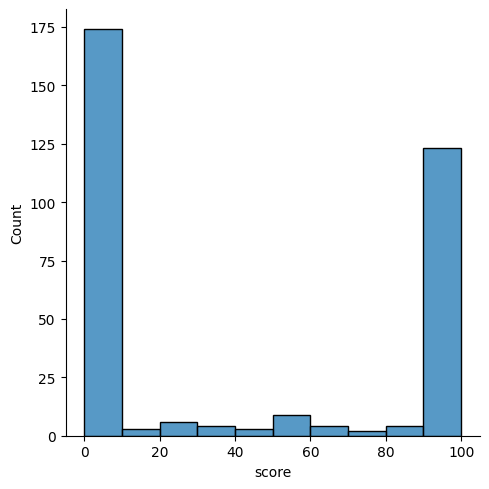

In [14]:
sns.displot(data=df, x="score")

In [19]:
df["model"] = "gpt3.5"

/tmp/ipykernel_13203/4146353772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["model"] = "gpt3.5"


In [21]:
df.score

,Unnamed: 0.1,Unnamed: 0,id,course_id,type,exam,prompt,testcase,max_score,input_str,...,dictionary,item_set,tuple,skeleton,code,exec_result,score,text,correctness,model
0,0,0,a3_3_animals,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,\nfor animal in list_of_animals:\n print(an...,completed,0.0,Unit Test Returned: 0.0\n,False,gpt3.5
1,1,1,a3_1_cargo,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\nimport random, m...",100,0,...,0,0,0,NaN,NaN,completed,0.0,----------------------------------------------...,False,gpt3.5
2,2,2,a3_3_games,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,# AUTOGRADER IMPORT REMOVED\n\n# -------------...,\nfor game in list_of_games:\n print(game)\n,completed,0.0,Unit Test Returned: 0.0\n,False,gpt3.5
4,4,6,lsn9_practice4,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,NaN,\ndef get_area_in_acres():\n acres = float(...,completed,0.0,--------------------------------------------\n...,False,gpt3.5
5,5,7,lsn9_practice3,2,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,NaN,"\nprice = float(input(""Enter the price in US d...",completed,0.0,Incorrect Pound Conversion. Expected 458.304\...,False,gpt3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,374,16,lsn8_fuel,2,lab,0,"Bellow is a problem statement, write a program...",from cs110 import autograder\r\nimport random\...,100,0,...,0,0,0,NaN,"\ndef pilot_action(fuel_load, distance_to_base...",completed,0.0,-------------------------------\nTest 1\n-----...,False,gpt3.5
375,375,234,a1_4_satellite,2,skill,1,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,NaN,NaN,completed,0.0,----------------------------------\nTesting sp...,False,gpt3.5
376,376,249,lsn21_bouncingball,3,lab,0,"Bellow is a problem statement, write a program...","from cs110 import autograder\r\nimport random,...",100,0,...,0,0,0,NaN,NaN,completed,100.0,Thank you for your submission. Your instructor...,True,gpt3.5
377,377,537,Lists2_population,4,lab,0,"Bellow is a problem statement, write a program...",from cs110 import autograder\r\nimport random\...,100,0,...,0,0,0,NaN,"\ncities_table = [\n [""Tokyo"", 37435191],\n...",completed,100.0,\nCORRECT\nUnit Test Returned: 100.0\n,True,gpt3.5


In [31]:
df[df.type == "lab"].score.mean()

41.38682926829268

In [32]:
df[df.type == "skill"].score.mean()

42.99160104986877

/scratch/work/koutchc1/.conda_envs/learnlab2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


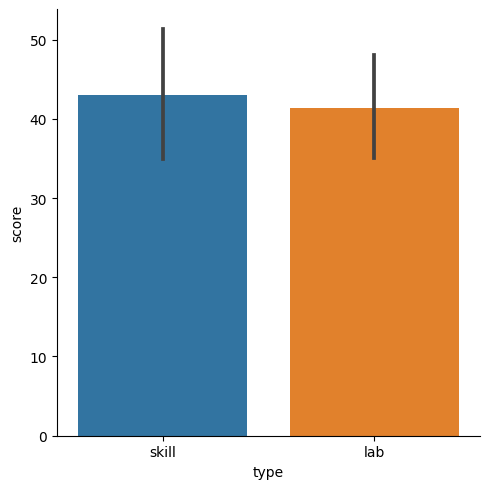

In [33]:
sns.catplot(data=df, x="type", y="score", kind="bar")

Let's take a look at what's the average correctness 